Your name: Han Tran

Your matriculation number: 2001708

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
%matplotlib inline

# QUESTION 1: 

In the following, you will have to analyse a dataset to perform tasks that data analysts working for a insurance company perform regularly: identifying the risky customers. In the dataset, ’insurance.csv’, there is some information about the insured people: 

(i) age, 
(ii) gender, 
(iii) BMI (body mass index), 
(iv)number of children, 
(v) whether the person is a smoker, 
(vi) the region within US where the person lives,
(vii) charges, i.e. the amount of money the insurance company had to pay for different medical costs of
the person. 

You need to perform the following steps:

In [ ]:
# Import the dataset
insurance=pd.read_csv('insurance.csv')
insurance

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

-> No missing value

In [ ]:
#Check the data type for each column
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


-> Looks like "age", "children", "bmi" (body mass index) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). 
None of the columns contain any missing values.


In [ ]:
# Check the correlation among variables
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
# Display statistics for the numerical columns
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.


a) Determine the region with the highest total amount of charges!

In [ ]:
# I want to see the relationship between regions and charges
insurance[['region']].groupby(insurance['charges']).sum()

,region
charges,
1121.87390,southeast
1131.50660,southeast
1135.94070,southeast
1136.39940,southeast
1137.01100,southeast
...,...
55135.40209,northwest
58571.07448,northeast
60021.39897,northwest


In [ ]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# Getting the list of neighbourhood groups
region_list = insurance.region.unique()
region_list

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
for i in region_list :
    print('The total number of charges in', i, 'is ', insurance.loc[insurance.region == i].charges.sum())

The total number of charges in southwest is  4012754.6476200004
The total number of charges in southeast is  5363689.763289999
The total number of charges in northwest is  4035711.9965399997
The total number of charges in northeast is  4343668.583309


In [ ]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


b) Create a pivot table indexed with gender and number of children variables, and focusing on the charges. Which combination of gender and number of children has the highest average charge value?

In [244]:
insurance.pivot_table(
    columns='charges',
    index=['gender','children'],
    aggfunc='sum')



age                                                  \
charges         1121.87390  1131.50660  1135.94070  1136.39940  1137.01100    
gender children                                                               
female 0                NaN         NaN         NaN         NaN         NaN   
male   0               18.0        18.0        18.0        18.0        18.0   

                                                                             \
charges         1137.46970  1141.44510  1146.79660  1149.39590  1163.46270    
gender children                                                               
female 0                NaN         NaN         NaN         NaN         NaN   
male   0               18.0        18.0        18.0        18.0        18.0   

                 ... region_southwest                                      \
charges          ...      48885.13561 48970.24760 49577.66240 51194.55914   
gender children  ...                                                        
female 0         ...              0.0         NaN         NaN         NaN   
male   0         ...              NaN         0.0         0.0         1.0   

                                                                             \
charges         52590.82939 55135.40209 58571.07448 60021.39897 62592.87309   
gender children                                                               
female 0                NaN         0.0         0.0         NaN         NaN   
male   0                1.0         NaN         NaN         0.0         0.0   

                             
charges         63770.42801  
gender children              
female 0                0.0  
male   0                NaN  

[2 rows x 6685 columns]

c) Do smokers or non-smokers have higher average charges? Check whether the difference is statistically
significant using a t-test!

In [ ]:
insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
smoker = insurance[insurance['smoker']=='yes']['charges']
non_smoker = insurance[insurance['smoker']=='no']['charges']
from scipy import stats
from statistics import variance
stats.levene(smoker, non_smoker)
stats.ttest_ind(smoker, non_smoker, equal_var = False)

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

In [61]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

# Selecting charges corresponding to smokers as an array
smoker = np.array(insurance[insurance.smoker == 'yes'].charges)

# Selecting charges corresponding to non-smokers as an array
non_smoker = np.array(insurance[insurance.smoker == 'no'].charges)

#Performing an Independent t-test
t, p_value  = stats.ttest_ind(smoker,non_smoker, axis = 0) 

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')


Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


Result: Smokers seem to claim significantly more charges than non-smokers


d) Using groupby(), calculate the correlation between age and charges for each region in the dataset
separately. In which region do you find the highest correlation?

In [ ]:
insurance[['age', 'region']].groupby(insurance['charges']).sum()

,age
charges,
1121.87390,18
1131.50660,18
1135.94070,18
1136.39940,18
1137.01100,18
...,...
55135.40209,33
58571.07448,31
60021.39897,52


In [ ]:
# check the relationship between age and charges
insurance['age'].corr(insurance['charges'])

0.29900819333064765

In [ ]:
# Number of males and females in a given year

insurance.groupby('region').charges.sum()

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

In [ ]:
group_df = insurance[['charges', 'age']].groupby(insurance['region'])
group_df

In [55]:
group_df.corr()

charges       age
region                               
northeast charges  1.000000  0.300951
          age      0.300951  1.000000
northwest charges  1.000000  0.337654
          age      0.337654  1.000000
southeast charges  1.000000  0.310593
          age      0.310593  1.000000
southwest charges  1.000000  0.258358
          age      0.258358  1.000000

In [289]:
#the list or corrrelation among variables with region
correlation = insurance['age', 'charges', 'bmi'
                       ].corr()['region']
correlation = correlation.drop('region')
correlation

KeyError: ('age', 'charges', 'bmi')

In [270]:
#identify the ones with the highest correlations
correlation.loc[correlation.isin([correlation.max()])]

NameError: name 'correlation' is not defined

e) In general, a BMI value between 18.5 and and 24.9 is considered healthy. Create a new column in
the data, which is True (or 1) when the BMI in that row is in the healthy range, and False (or 0)
otherwise. Are there more people with healthy or unhealthy BMI in the dataset?

In [187]:
insurance['bmi'] = np.where((insurance['bmi']>18.5) & (insurance['bmi']<24.9), True, False)
insurance.head()

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,False,0,yes,16884.92400,0,0,1
1,18,male,False,0,no,1725.55230,0,1,0
2,28,male,False,0,no,4449.46200,0,1,0
3,33,male,False,0,no,21984.47061,1,0,0
4,32,male,False,0,no,3866.85520,1,0,0


In [238]:
conditions = [
    (insurance['bmi'] < 18.5),
    (insurance['bmi'] >= 18.5) & (insurance['bmi'] <= 24.9),
    (insurance['bmi'] > 24.9)
    ]

# create a list of the values we want to assign for each condition
values = ['unhealthy', 'healthy', 'unhealthy']

# create a new column and use np.select to assign values to it using our lists as arguments
insurance['Health'] = np.select(conditions, values)

# display updated DataFrame
insurance.head()

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,healthy,Health,family_tree
0,19,female,False,0,yes,16884.92400,0,0,1,unhealthy,unhealthy,0
1,18,male,False,0,no,1725.55230,0,1,0,unhealthy,unhealthy,0
2,28,male,False,0,no,4449.46200,0,1,0,unhealthy,unhealthy,0
3,33,male,False,0,no,21984.47061,1,0,0,unhealthy,unhealthy,0
4,32,male,False,0,no,3866.85520,1,0,0,unhealthy,unhealthy,0


In [198]:
insurance.Health.value_counts()

unhealthy    1338
Name: Health, dtype: int64

f) • Using the column created in the previous task, calculate the average value of charges for people with
healthy and unhealthy BMI separately. Can you confirm that the healthy BMI range results in lower
charges? Use a t-test to confirm your finding.

In [233]:
from scipy import stats
from statistics import variance
healthy = insurance[insurance['Health']=='healthy']['charges']
unhealthy = insurance[insurance['Health']=='unhealthy']['charges']


In [234]:
stats.levene(healthy, unhealthy)
stats.ttest_ind(healthy, unhealthy, equal_var = False)



Ttest_indResult(statistic=nan, pvalue=nan)

In [229]:
print('The average of charges for a healthy is and the average of  for a unhealthy is '
      .format(healthy.mean(), unhealthy.mean()))


The average of charges for a healthy is and the average of  for a unhealthy is 


# QUESTION 2

In this exercise you have to work with the data about customers and their purchasing behaviour.
The main outcome of interest in the data is the variable ’Response’, indicating whether the
customer reacted positively or not to the most recent marketing campaign. Using the data provided,
you need to form some ideas on what variables are related to the customer’s response. In the first file
’marketing demographics.csv’, you find basic information about the customers: (i) education level, (ii)
marital status, (iii) yearly income, (iv) country, (v) age, and (vi) number of children. In the second file
’marketing business.csv’, you can find information about the customer’s interaction with the company:
(i) total amount of money spent on items, (ii) total number of purchases, also separately for purchases
performed online and in the physical store, (iii) the number of times the customer accepted some campaign
offers in the past, (iv) the number of times the customer visited the company website in the month before
the most recent campaign, (v) the number of times the customer made a complaint in the past, and (vi)
the customer’s response to the most recent campaign.
You have to perform some descriptive analysis tasks on this dataset, both graphical and non-graphical.
As the first step, import and then combine the files using the single shared column, ’ID’.

In [ ]:
# Load the data marketing_demographics
marketing_demographics= pd.read_csv('marketing_demographics.csv')
marketing_demographics

,ID,Education,Marital_Status,Income,Country,Age,Children
0,0,Graduation,Married,70951.0,SA,37,0
1,1,Graduation,Single,57091.0,CA,61,0
2,9,Master,Single,46098.0,CA,47,2
3,13,PhD,Widow,25358.0,SA,75,1
4,17,PhD,Married,60491.0,SP,51,1
...,...,...,...,...,...,...,...
2211,11178,Master,Single,42394.0,GER,50,1
2212,11181,PhD,Married,156924.0,CA,73,0
2213,11187,Basic,Single,26487.0,CA,44,1
2214,11188,Graduation,Together,26091.0,SP,65,2


In [ ]:
# Load the data marketing_business
marketing_business= pd.read_csv('marketing_business.csv')
marketing_business

,ID,Total_Amount,Total_Purchase,Web_Purchase,Store_Purchase,Accepted_Campaigns,Website_Visit,Complaint,Response
0,1826,1190,14,4,10,0,1,0,1
1,1,577,17,7,10,1,5,0,1
2,10476,251,10,3,7,0,2,0,0
3,1386,11,3,1,2,0,7,0,0
4,5371,91,6,3,3,1,7,0,1
...,...,...,...,...,...,...,...,...,...
2211,10142,689,18,5,13,0,4,0,0
2212,5263,55,4,1,3,0,8,0,0
2213,22,309,12,6,6,0,8,0,0
2214,528,1383,19,5,14,0,3,0,0


In [ ]:
combine_data = pd.merge(marketing_demographics, marketing_business, on="ID")
combine_data

,ID,Education,Marital_Status,Income,Country,Age,Children,Total_Amount,Total_Purchase,Web_Purchase,Store_Purchase,Accepted_Campaigns,Website_Visit,Complaint,Response
0,0,Graduation,Married,70951.0,SA,37,0,1198,16,3,13,0,1,0,0
1,1,Graduation,Single,57091.0,CA,61,0,577,17,7,10,1,5,0,1
2,9,Master,Single,46098.0,CA,47,2,120,7,3,4,0,8,0,0
3,13,PhD,Widow,25358.0,SA,75,1,32,4,1,3,0,6,0,0
4,17,PhD,Married,60491.0,SP,51,1,1028,24,6,18,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,11178,Master,Single,42394.0,GER,50,1,32,4,1,3,0,7,0,0
2212,11181,PhD,Married,156924.0,CA,73,0,8,0,0,0,0,0,0,0
2213,11187,Basic,Single,26487.0,CA,44,1,69,6,2,4,0,5,0,0
2214,11188,Graduation,Together,26091.0,SP,65,2,89,6,2,4,0,5,0,0


In [ ]:
# Check the type of data in each column
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2215
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2216 non-null   int64  
 1   Education           2216 non-null   object 
 2   Marital_Status      2216 non-null   object 
 3   Income              2216 non-null   float64
 4   Country             2216 non-null   object 
 5   Age                 2216 non-null   int64  
 6   Children            2216 non-null   int64  
 7   Total_Amount        2216 non-null   int64  
 8   Total_Purchase      2216 non-null   int64  
 9   Web_Purchase        2216 non-null   int64  
 10  Store_Purchase      2216 non-null   int64  
 11  Accepted_Campaigns  2216 non-null   int64  
 12  Website_Visit       2216 non-null   int64  
 13  Complaint           2216 non-null   int64  
 14  Response            2216 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 277.0

In [ ]:
#Check the missing values before fit into the models
# We dont have any missing values
combine_data.isnull().sum()

ID                    0
Education             0
Marital_Status        0
Income                0
Country               0
Age                   0
Children              0
Total_Amount          0
Total_Purchase        0
Web_Purchase          0
Store_Purchase        0
Accepted_Campaigns    0
Website_Visit         0
Complaint             0
Response              0
dtype: int64

a) Visualization: create 6 plots of your choice based on the data and explain what information you
gain from them; the plots can be histograms, boxplots etc. You need to create some univariate and
multivariate plots, and focus mainly on the ’Response’ column and in general the spending patterns
of customers. The created visuals should address at least the following issues : (i) relationship
between income of the customer and response to campaigns (in the past and in the most recent
case); (ii) spending (amount and purchase) across countries; (iii) relationship between income and
total amount/purchase; (iv) relationship between total amount/purchase and response to current
and past campaigns

 -CREATE UNIVARIATE SCATTER PLOT :


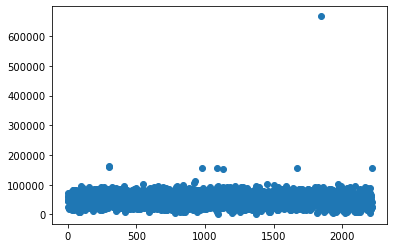

In [ ]:
plt.scatter(combine_data.index, combine_data['Income'])
plt.show()

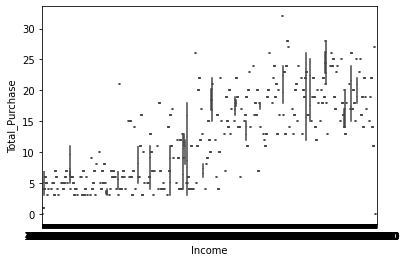

In [26]:
sns.boxplot(data=combine_data, x='Income', y='Total_Purchase')
plt.show()

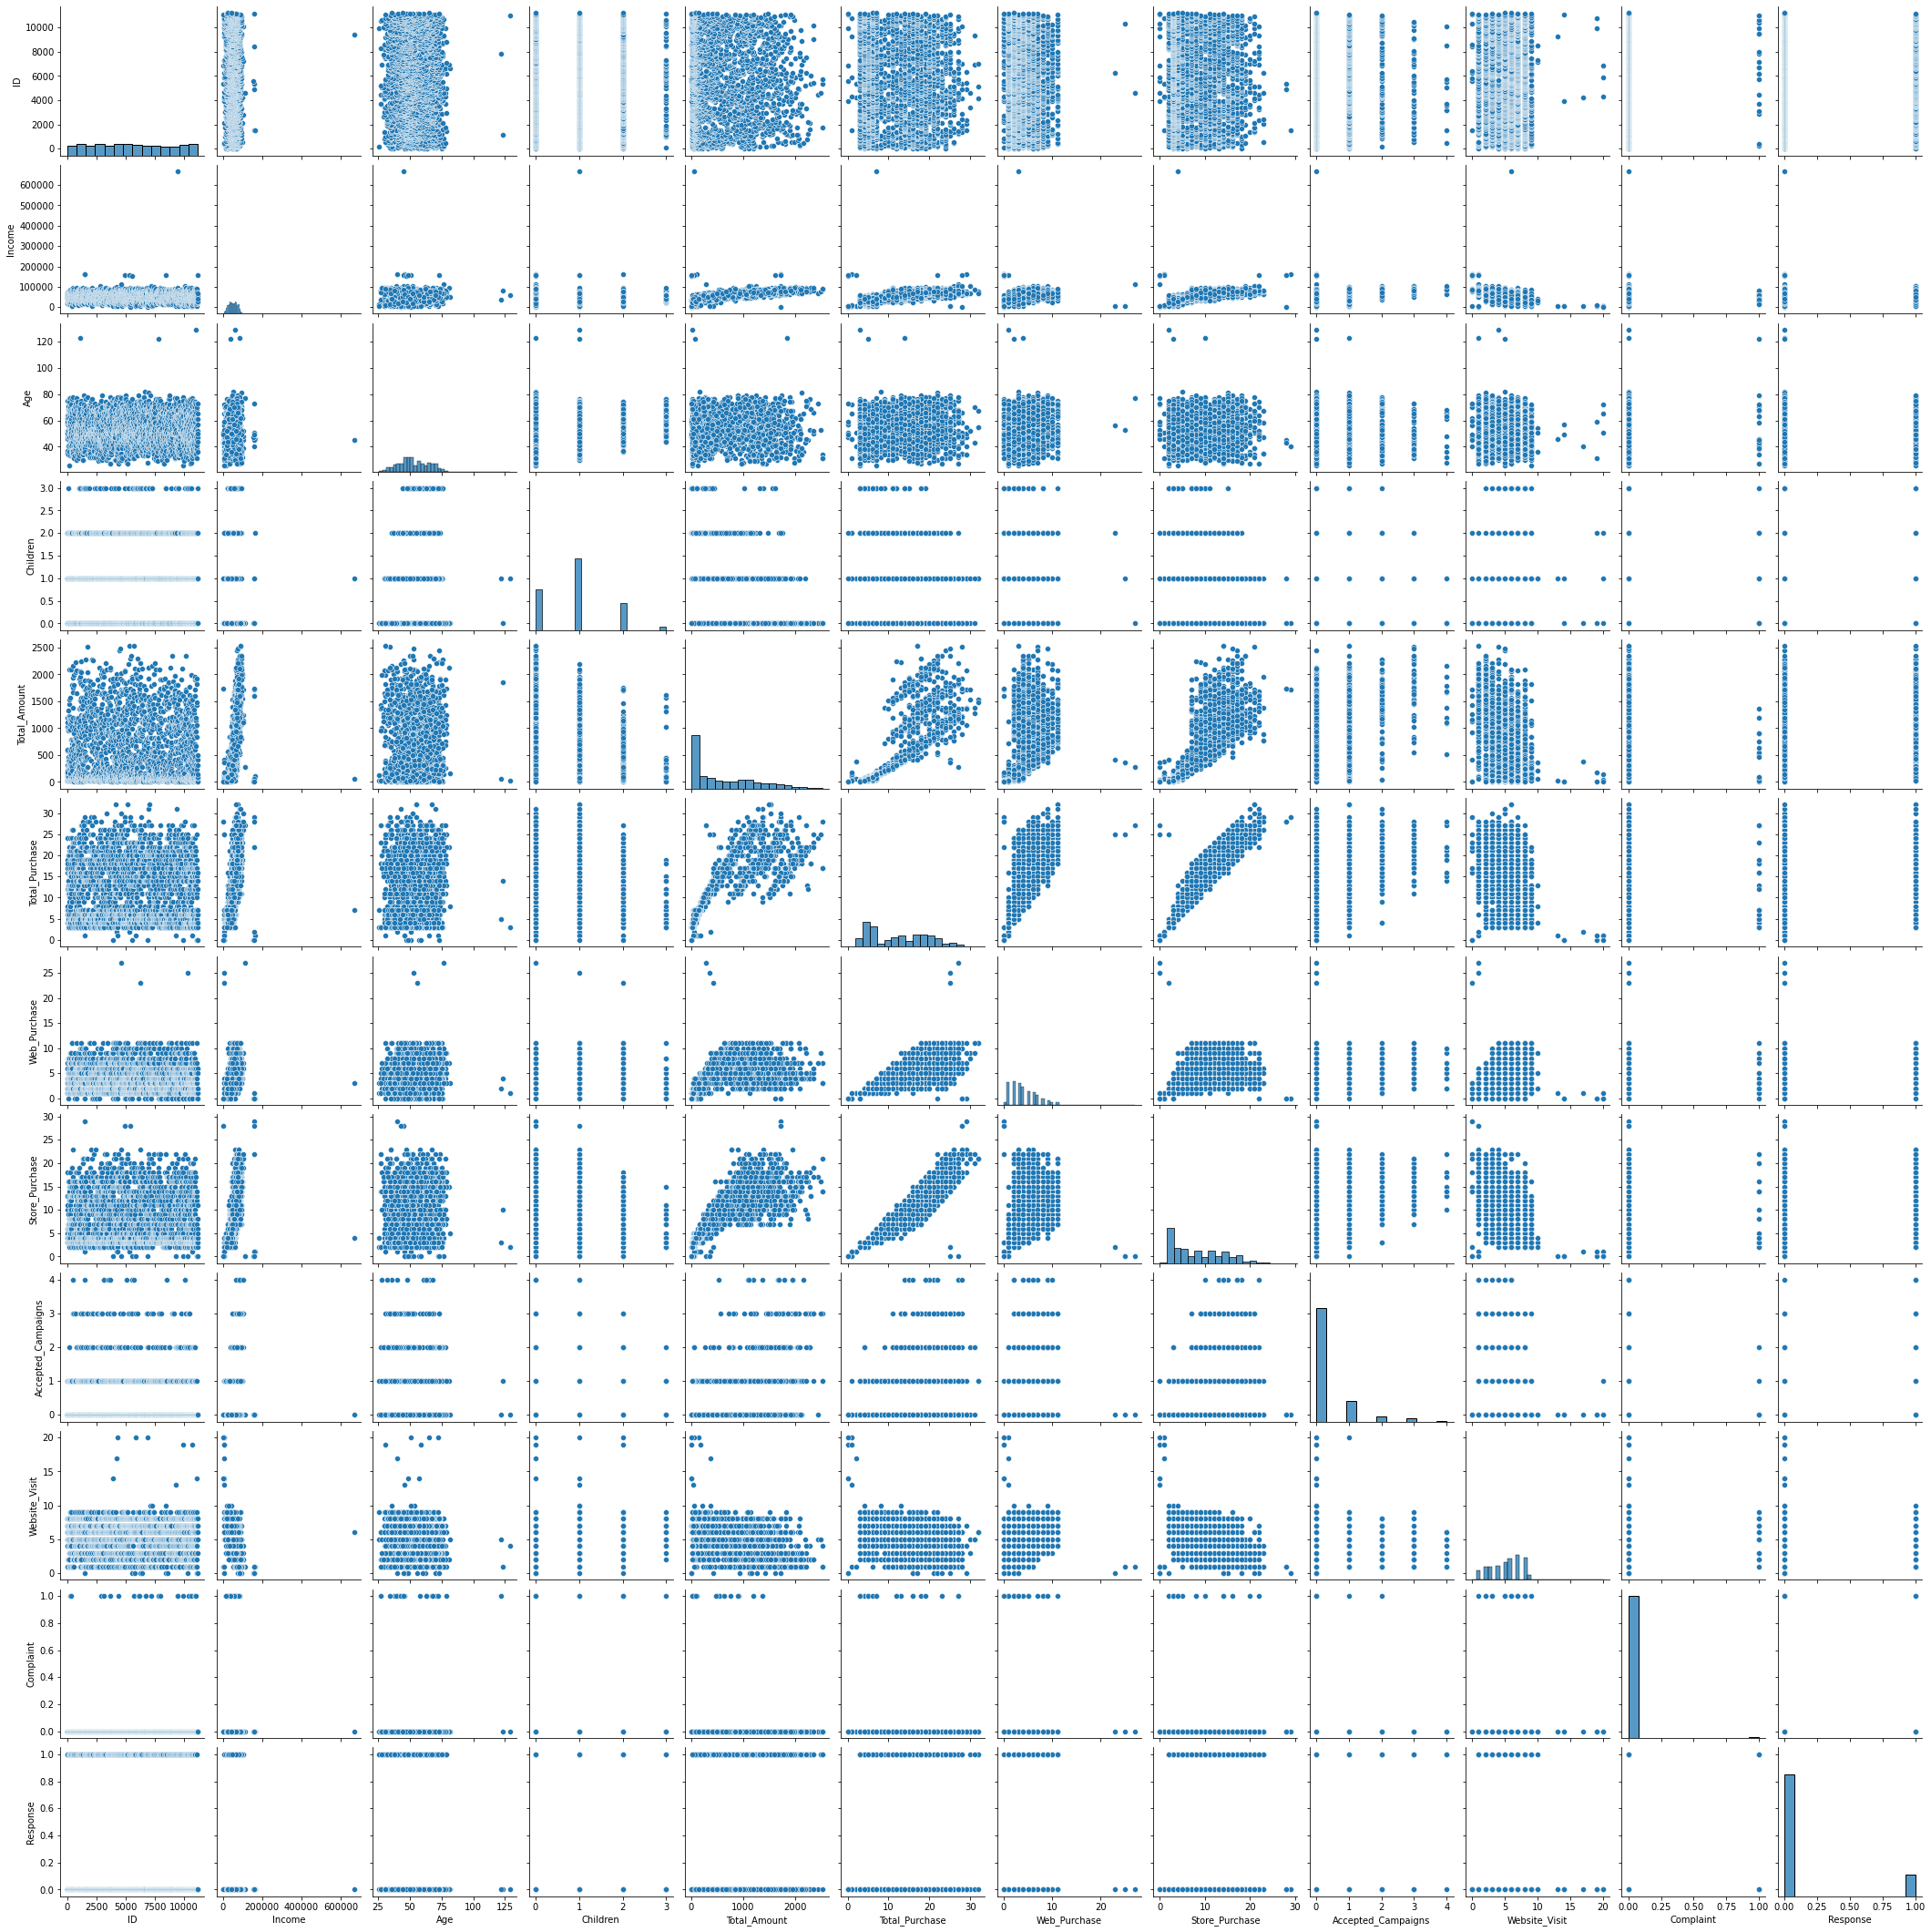

In [31]:
sns.pairplot(combine_data)

(i) relationship
between income of the customer and response to campaigns (in the past and in the most recent
case); 


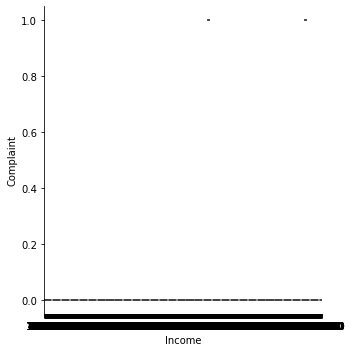

In [272]:
# Relationship between income of the customer and response to campaigns in the past

sns.catplot(x="Income", y ="Complaint", data=combine_data, kind="box")

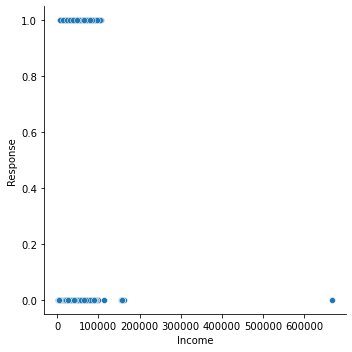

In [273]:
# Relationship between income of the customer and response to campaigns recently

sns.relplot(x="Income", y ="Response", data=combine_data, kind="scatter")

(ii) spending (amount and purchase) across countries; 



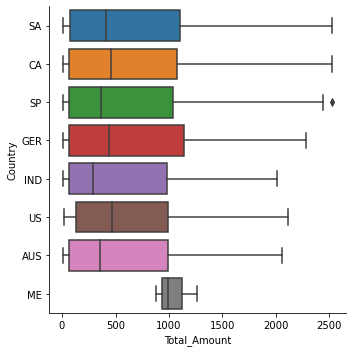

In [281]:
sns.catplot(x='Total_Amount', y='Country', data=combine_data, kind="box")


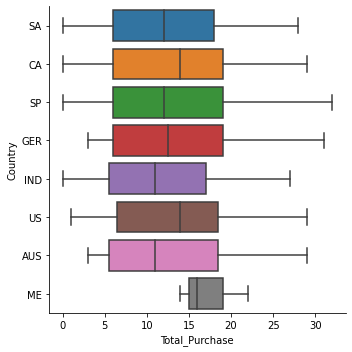

In [282]:
sns.catplot(x='Total_Purchase', y='Country', data=combine_data, kind="box")

(iii) relationship between income and total amount/purchase; 

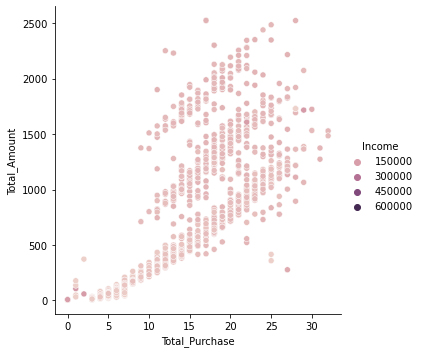

In [283]:
#relationship between income and total amount

sns.relplot(x='Total_Purchase', y='Total_Amount', data=combine_data,hue='Income', kind='scatter')

(iv) relationship between total amount/purchase and response to current
and past campaigns

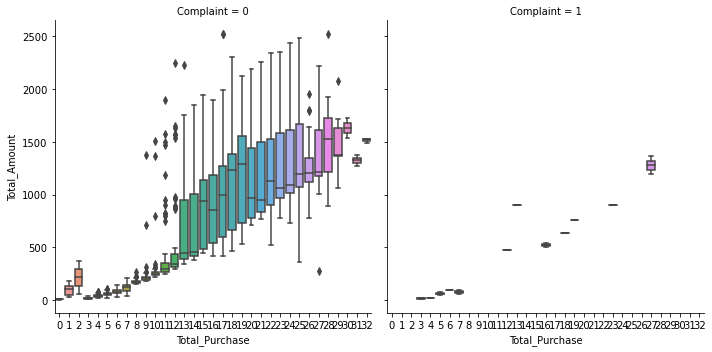

In [286]:
# Similarly the boxplot between the total amount/purchase and response  in the past campaigns
sns.catplot(x='Total_Purchase', y='Total_Amount', data= combine_data,
            kind='box', col='Complaint')

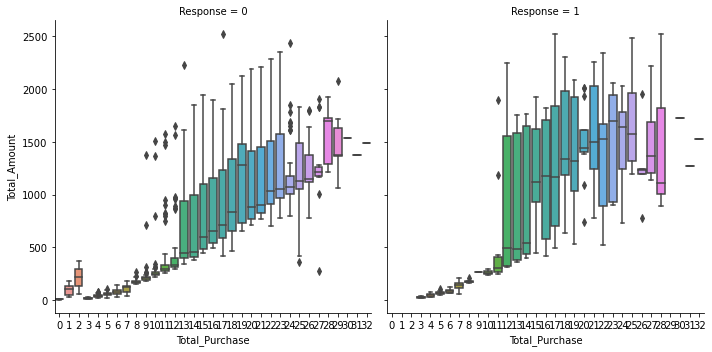

In [287]:
# Similarly the boxplot between the total amount/purchase and response  in the curent campaigns
sns.catplot(x='Total_Purchase', y='Total_Amount', data= combine_data,
            kind='box', col='Response')

b) Descriptive statistics: You are free to explore the data with any of the tools we used in the course
to understand the relationship between Response and general spending of the customers and other
variables. You need to at least address the issues mentioned in the visual analysis part. Note that,
as ’Response’ is not considered a numeric variable, as it only has two possible values, you want to
use either cross-tabulation (to compare with other categorical variables) or groupby and aggregation
(to compare with numeric variables).

# QUESTION 3

In this exercise, you will have to continue working with the Insurance dataset, and prepare it
for further modeling through the following steps. You have to solve these tasks in sequence, so each task
needs to be performed on the output data of the previous task.

In [30]:
# Import the dataset
insurance=pd.read_csv('insurance.csv')
insurance

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [29]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


So we have following columns as numeric cols: Age, bmi, children, and charges

Remove outliers: (i) for the column ’charges’, remove the top 2% of values, and (ii) for column ’bmi’,
remove the top 2% and the bottom 2%

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

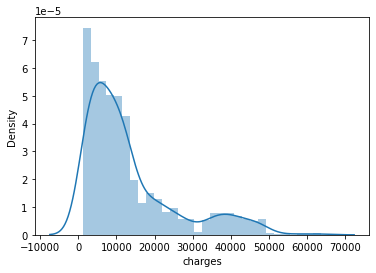

In [43]:
sns.distplot(insurance.charges)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

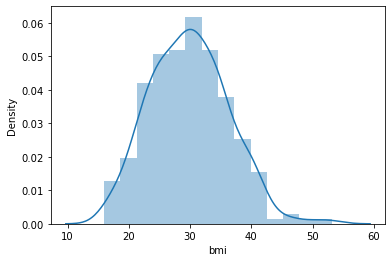

In [64]:
# Remove the outlier for the charges column
bmi_cut_off= insurance['charges'].quantile(0.02)
bmi_outlier_removed= insurance[insurance['charges']< charges_cut_off]
bmi_outlier_removed.bmi
sns.distplot(bmi_outlier_removed.bmi)

In [78]:
insurance['bmi_with_top_2%']= (insurance['bmi']<0.98).astype('category')
insurance['bmi_with_bottom_2%']= (insurance['bmi']>0.02).astype('category')
insurance

,age,gender,bmi,children,smoker,region,charges,bmi_with_top_2%,bmi_with_bottom_2%
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,False,True
2,28,male,33.000,3,no,southeast,4449.46200,False,True
3,33,male,22.705,0,no,northwest,21984.47061,False,True
4,32,male,28.880,0,no,northwest,3866.85520,False,True
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False,True
1334,18,female,31.920,0,no,northeast,2205.98080,False,True
1335,18,female,36.850,0,no,southeast,1629.83350,False,True
1336,21,female,25.800,0,no,southwest,2007.94500,False,True


In [127]:
insurance.dtypes

age                   int64
gender               object
bmi                 float64
children              int64
smoker               object
charges             float64
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [79]:
insurance['bmi'] = (insurance.bmi > 0.02).astype(int)

• Create dummy variables (one-hot encoding) for the columns ’region’.

In [ ]:
insurance = pd.get_dummies(insurance, columns=['region'], drop_first=True)

In [148]:
insurance.head()

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


Create a categorical version of ’bmi’ column with four categories and corresponding labels: (i) below
18.5, ’Underweight’, (ii) between 18.5 and 24.9, ’Healthy’, (iii) between 24.5 and 30, ’Overweight’,
and (iv) above 30, ’Obese’.

In [152]:
Underweight=insurance[(insurance['bmi']>0) & (insurance['bmi']<18.5)]
Healthy=insurance[(insurance['bmi']>18.5) & (insurance['bmi']<24.9)]
Overweight=insurance[(insurance['bmi']>24.5) & (insurance['bmi']<30)]
Obese=insurance[(insurance['bmi']>30)]
print ('Group Underweight', 
       Underweight)
print ('Group Healthy', 
       Healthy)
print ('Group Overweight', 
       Overweight)
print ('Group Obese', 
       Obese)

Group Underweight       age  gender     bmi  children smoker      charges  region_northwest  \
28     23    male  17.385         1     no   2775.19215                 1   
128    32  female  17.765         2    yes  32734.18630                 1   
172    18    male  15.960         0     no   1694.79640                 0   
198    51  female  18.050         0     no   9644.25250                 1   
232    19  female  17.800         0     no   1727.78500                 0   
250    18    male  17.290         2    yes  12829.45510                 0   
380    27  female  17.955         2    yes  15006.57945                 0   
410    19    male  17.480         0     no   1621.34020                 1   
412    26  female  17.195         2    yes  14455.64405                 0   
428    21  female  16.815         1     no   3167.45585                 0   
680    21  female  17.400         1     no   2585.26900                 0   
821    26    male  17.670         0     no   2680.94930   

d) Create a simple version of the column ’children’, which is 0, if the original value is 0, and 1 otherwise
(i.e. an indicator specifying whether a person has any children or not at all).

In [210]:
# We can create a new column with informative labels

conditions_children = [
    (insurance['children'] < 0),
    (insurance['children'] >=1)
    ]

# create a list of the values we want to assign for each condition
value = ['0', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
insurance['family_tree'] = np.select(conditions_children , value)

# display updated DataFrame
insurance.head()

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,healthy,Health,family_tree
0,19,female,False,0,yes,16884.92400,0,0,1,unhealthy,unhealthy,0
1,18,male,False,0,no,1725.55230,0,1,0,unhealthy,unhealthy,0
2,28,male,False,0,no,4449.46200,0,1,0,unhealthy,unhealthy,0
3,33,male,False,0,no,21984.47061,1,0,0,unhealthy,unhealthy,0
4,32,male,False,0,no,3866.85520,1,0,0,unhealthy,unhealthy,0


e) Scale the columns ’charges’ and ’age’ using the StandardScaler transformation.

In [164]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'charges'] 
scaler = StandardScaler()
scaler.fit(insurance[numeric_cols])


StandardScaler()

In [165]:
scaler.mean_

array([   39.20702541, 13270.42226514])

In [166]:
scaler.var_

array([1.97253852e+02, 1.46542766e+08])

In [167]:
scaled_inputs = scaler.transform(insurance[numeric_cols])
scaled_inputs

array([[-1.43876426,  0.2985838 ],
       [-1.50996545, -0.95368917],
       [-0.79795355, -0.72867467],
       ...,
       [-1.50996545, -0.96159623],
       [-1.29636188, -0.93036151],
       [ 1.55168573,  1.31105347]])